# Leave-One-In Protocol: Plot Average Rank Vs Edit

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
directory = '' # Add the directory name
filename = directory +'final_ranking.xlsx'# Add the file name

In [3]:
# Change the working directory to the location of the file
os.chdir(os.path.dirname(directory))

csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]

# Create an empty DataFrame to store the combined results
combined_results = pd.DataFrame()

In [4]:
# Read the result files of each random BT
for file_name in csv_files:
    file_path = os.path.join(directory, file_name)
    random_bt_results = pd.read_csv(file_path)

    # Filter the rows where 'Random BT' equals 'Case'
    filtered_results = random_bt_results.loc[random_bt_results['Random BT'] == random_bt_results['Case']]

    # Select the desired columns
    filtered_results = filtered_results[['Random BT', 'Case', 'Edit Distance', 'Rank', 'Structural Similarity', 'Edits']]
    
    # Append the filtered results to the combined_results DataFrame
    combined_results = pd.concat([combined_results, filtered_results], ignore_index=True)

# # Store the combined results into a single CSV file
# combined_results.to_csv(directory + f'final_ranking.csv', index=False)

# Save the combined results to an Excel file
combined_results.to_excel(filename, index=False, engine='openpyxl')

In [5]:
# Plot the data for leave-one-in protocol

# Step 1: Read the data from the Excel file
df = pd.read_excel(filename)

# Step 2: Group the data by 'Random BT' and 'Structural Similarity' and calculate the average rank for each group
grouped_data = df.groupby(['Random BT', 'Structural Similarity'])['Rank'].mean().reset_index()

# Step 2: Calculate the average rank for each 'Structural Similarity' and 'Edits' combination
avg_ranks = df.groupby(['Structural Similarity', 'Edits'])['Rank'].mean().reset_index()

# Step 3: Filter the DataFrame to keep only the rows with the minimum and maximum ranks for each group
min_ranks = avg_ranks.loc[avg_ranks.groupby('Structural Similarity')['Rank'].idxmin()]
max_ranks = avg_ranks.loc[avg_ranks.groupby('Structural Similarity')['Rank'].idxmax()]

# Step 4: Plot the Average Rank vs Edits for each 'Structural Similarity'
plt.figure(figsize=(10, 6))

# # Step 5: Set the Tableau color palette
# # tableau_palette = sns.color_palette("tab10")  # You can use "tab20" or "tab20b" as well
custom_palette = ['Teal', 'purple', 'red', 'gold', 'brown']  # Add more colors as needed

<Figure size 1000x600 with 0 Axes>

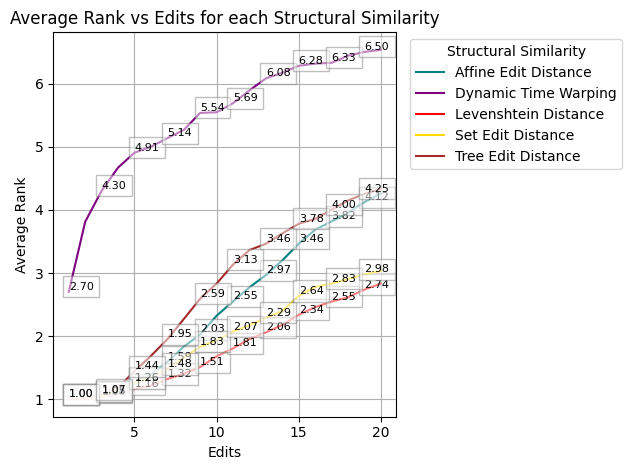

In [7]:
# **********************************************Seaborn*******************************************************
# Plot Average Rank Vs Edits for each Structural Similarity using Seaborn library

sns.lineplot(data=avg_ranks, x='Edits', y='Rank', hue='Structural Similarity', markers=True, dashes=False, palette=custom_palette)

# Show the rank values on the graph
for index, row in avg_ranks.iterrows():
    text = f"{row['Rank']:.2f}"
    if index % 2 == 0:  # To prevent overlapping, show the text only for every other data point
        plt.text(row['Edits'], row['Rank'], text, ha='left', va='bottom', fontsize=8,
                 bbox=dict(facecolor='white', alpha=0.5, edgecolor='gray'))

plt.xlabel('Edits')
plt.ylabel('Average Rank')
plt.legend(title='Structural Similarity', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(True)
plt.title('Average Rank vs Edits for each Structural Similarity')
plt.tight_layout()  # Adjust the layout to prevent legend overlapping
plt.show()

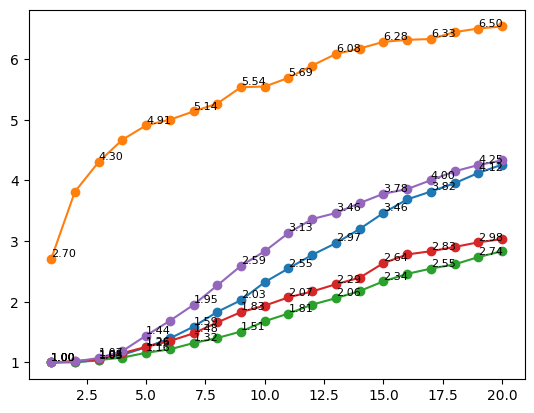

In [6]:
# ***********************Matplotlib*********************
# Plot Average Rank Vs Edits for each Structural Similarity using Matplotlib library

# Plot the lines for each 'Structural Similarity' using a loop
for similarity in avg_ranks['Structural Similarity'].unique():
    data = avg_ranks[avg_ranks['Structural Similarity'] == similarity]
    plt.plot(data['Edits'], data['Rank'], marker='o', linestyle='-', label=similarity)

# Show the rank values on the graph
for index, row in avg_ranks.iterrows():
    text = f"{row['Rank']:.2f}"
    if index % 2 == 0:  # To prevent overlapping, show the text only for every other data point
        plt.text(row['Edits'], row['Rank'], text, ha='left', va='bottom', fontsize=8)
